Study of type of trafic within the network (you need the data)

In [1]:
import pandas as pd
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pyplot as plt

path_data = "data/"

def get(name):
    return pd.read_pickle(path_data + name + ".pickle")

In [2]:
emails = get("emails")
ms = get("messages")
rs = get("recipients")
rs = rs.drop("type", axis=1).drop_duplicates() # Remove distinction of types (TO or CC...)
emails = emails.join(ms.e_id.value_counts().rename("n_sent")).join(rs.e_id.value_counts().rename("n_received"))
emails[["n_sent", "n_received"]] = emails[["n_sent", "n_received"]].fillna(0)
del ms, rs

In [3]:
def to_perc(x):
    return str(round(x*100,2)) + "%"

def get_weight(x, ref):
    print(to_perc(x.shape[0]/ref.shape[0]) + " du réseau ("+str(x.shape[0])+").")
    print(to_perc(x.n_received.sum()/(ref.n_received.sum())) + " du trafic entrant.")
    print(to_perc(x.n_sent.sum()/(ref.n_sent.sum())) + " du trafic sortant.")
    print(to_perc((x.n_sent.sum()+x.n_received.sum())/(ref.n_sent.sum() + ref.n_received.sum())) + " du trafic total.")

# Deads

In [4]:
deads = emails.loc[emails.n_received == 0].loc[emails.n_sent == 0]
get_weight(deads, emails)

0.2% du réseau (148).
0.0% du trafic entrant.
0.0% du trafic sortant.
0.0% du trafic total.


Pourcentage de personnes n'éméttant et ne recevant aucun emails

# Spams

In [5]:
spams = emails.loc[emails.n_received == 0].loc[emails.n_sent > 0]
get_weight(spams, emails)

9.7% du réseau (7332).
0.0% du trafic entrant.
9.19% du trafic sortant.
1.14% du trafic total.


Pourcentage de personne envoyant mais ne recevant aucun emails

# Listeners

In [6]:
listens = emails.loc[emails.n_received > 0].loc[emails.n_sent == 0]
get_weight(listens, emails)

76.61% du réseau (57889).
23.61% du trafic entrant.
0.0% du trafic sortant.
20.68% du trafic total.


# Actives

In [7]:
actives = emails.loc[emails.n_received > 0].loc[emails.n_sent > 0]
get_weight(actives, emails)

13.49% du réseau (10195).
76.39% du trafic entrant.
90.81% du trafic sortant.
78.18% du trafic total.


In [8]:
a = actives.n_sent + actives.n_received
a = a / a.sum() * 100

actives["percentage"] = a
actives = actives.sort_values("percentage", ascending=False)

In [9]:
actives.head()

,email,emp_id,n_sent,n_received,percentage
e_id,,,,,
73,jeff.dasovich@enron.com,73,6273.0,9416.0,0.985256
457,no.address@enron.com,0,3511.0,9466.0,0.814945
241,sara.shackleton@enron.com,67,4797.0,8088.0,0.809167
277,tana.jones@enron.com,48,4437.0,8423.0,0.807597
260,steven.j.kean@enron.com,51,2278.0,9200.0,0.720809


## Study of actives

<IPython.core.display.Javascript object>


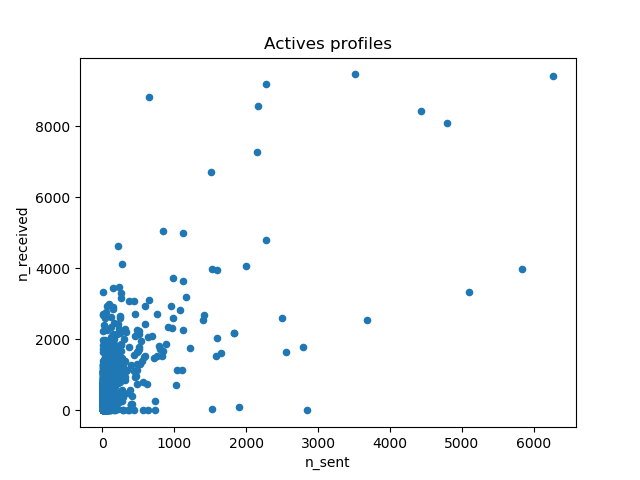

In [10]:
actives.plot.scatter(x="n_sent", y = "n_received", loglog = False, title="Actives profiles")

Profiles seem continous

<IPython.core.display.Javascript object>


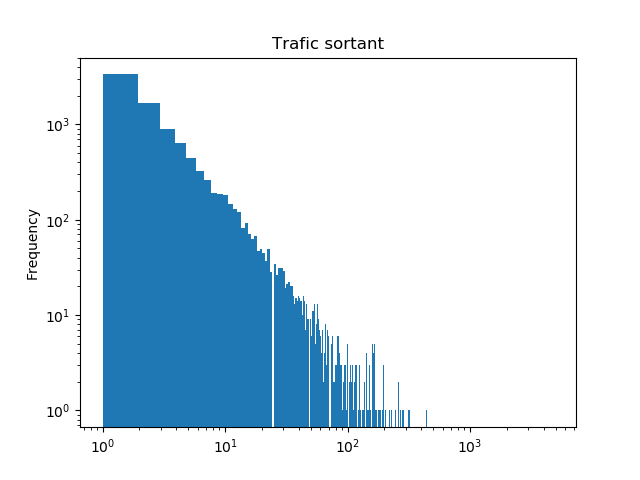

In [11]:
n_lim = 5000
plt.figure()
actives.loc[actives.n_sent < n_lim].n_sent.plot.hist(bins = n_lim - 2, title="Trafic sortant", loglog=True)

<IPython.core.display.Javascript object>


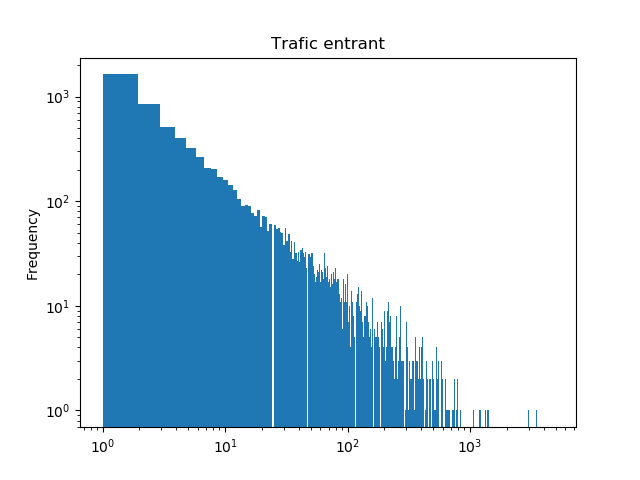

In [12]:
n_lim = 5000
plt.figure()
actives.loc[actives.n_received < n_lim].n_received.plot.hist(bins = n_lim - 2, title = "Trafic entrant", loglog=True)

## More actives

In [16]:
n_lim = 20
for n_lim in range(1,n_lim):
    print("n_lim = " + str(n_lim) + " :")
    r_actives = actives.loc[actives.n_received > n_lim].loc[actives.n_sent > n_lim]
    get_weight(r_actives, actives)
# best is 3 -> 3856

n_lim = 1 :
61.7% du réseau (6290).
93.35% du trafic entrant.
97.06% du trafic sortant.
93.88% du trafic total.
n_lim = 2 :
46.01% du réseau (4691).
88.62% du trafic entrant.
95.16% du trafic sortant.
89.57% du trafic total.
n_lim = 3 :
37.82% du réseau (3856).
85.02% du trafic entrant.
93.63% du trafic sortant.
86.26% du trafic total.
n_lim = 4 :
32.04% du réseau (3266).
81.58% du trafic entrant.
92.01% du trafic sortant.
83.08% du trafic total.
n_lim = 5 :
28.12% du réseau (2867).
78.79% du trafic entrant.
89.67% du trafic sortant.
80.35% du trafic total.
n_lim = 6 :
25.31% du réseau (2580).
76.93% du trafic entrant.
88.63% du trafic sortant.
78.61% du trafic total.
n_lim = 7 :
23.08% du réseau (2353).
74.63% du trafic entrant.
87.84% du trafic sortant.
76.54% du trafic total.
n_lim = 8 :
21.38% du réseau (2180).
72.86% du trafic entrant.
87.07% du trafic sortant.
74.91% du trafic total.
n_lim = 9 :
19.8% du réseau (2019).
71.18% du trafic entrant.
86.39% du trafic sortant.
73.37% du